In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# libraries
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import plotly.express as px #grafico interattivo
import plotly.graph_objects as go
import plotly.colors as colors

# Dataset opening and distribution observation

In [3]:
# importing dataset
freedom_cleaned=pd.read_csv('/content/drive/MyDrive/DS LAB - Colombaro, Ferretti, Fracchia, Salvatori/PROCESSED DATASETS/Happiness + Freedom/freedom_cleaned.csv')
freedom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               1338 non-null   object 
 1   Region                                     1338 non-null   object 
 2   C/T                                        1338 non-null   object 
 3   Edition                                    1338 non-null   int64  
 4   Status                                     1338 non-null   object 
 5   PR rating                                  1338 non-null   int64  
 6   CL rating                                  1338 non-null   int64  
 7   A1                                         1338 non-null   int64  
 8   A2                                         1338 non-null   int64  
 9   A3                                         1338 non-null   int64  
 10  A                       

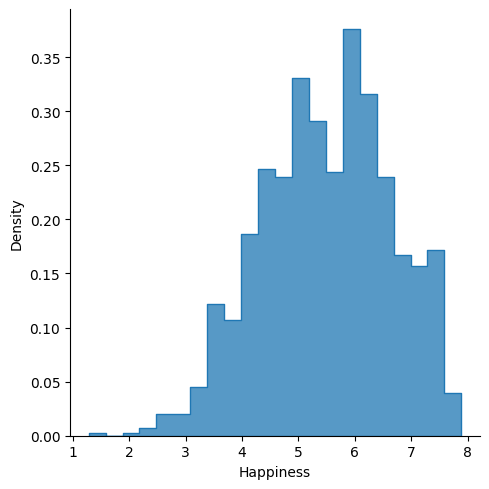

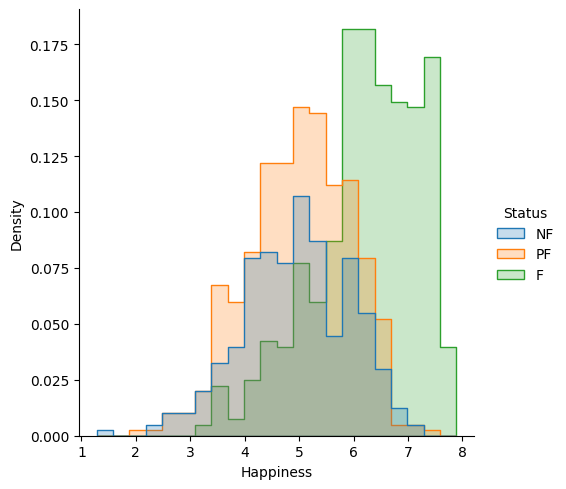

In [4]:
# Happiness distribution according to 'Status'

sns.displot(freedom_cleaned, x="Happiness", element="step", stat="density")

sns.displot(freedom_cleaned, x="Happiness", hue="Status", element="step", stat="density")


# Quite bell-shaped

# Mixture model on 2013

In [5]:
#  filtering year of interest
h_2013 = freedom_cleaned[freedom_cleaned['Edition']==2013]
h_2013.reset_index(inplace=True)
h_2013.drop('index', axis=1, inplace=True)
h_2013.info()
h_2013.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               135 non-null    object 
 1   Region                                     135 non-null    object 
 2   C/T                                        135 non-null    object 
 3   Edition                                    135 non-null    int64  
 4   Status                                     135 non-null    object 
 5   PR rating                                  135 non-null    int64  
 6   CL rating                                  135 non-null    int64  
 7   A1                                         135 non-null    int64  
 8   A2                                         135 non-null    int64  
 9   A3                                         135 non-null    int64  
 10  A                         

<ipython-input-5-29a3d059199f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_2013.drop('index', axis=1, inplace=True)


Country name       0
Region             0
C/T                0
Edition            0
Status             0
                  ..
iso_3166-2         1
region             1
sub-region         1
region-code        1
sub-region-code    1
Length: 76, dtype: int64

In [6]:
h_2013

,Country name,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,Perceptions of corruption % change,Positive affect,Negative affect,Happiness scaled,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,Asia,c,2013,NF,6,6,1,1,1,...,0.0,0.547417,0.273328,35.721004,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Albania,Europe,c,2013,PF,3,3,3,3,2,...,0.0,0.540751,0.338379,45.506477,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
2,Angola,Africa,c,2013,NF,6,5,0,2,2,...,0.0,0.650047,0.370875,39.371068,24.0,ISO 3166-2:AO,Africa,Sub-Saharan Africa,2.0,202.0
3,Argentina,Americas,c,2013,F,2,2,4,4,3,...,0.0,0.766157,0.254205,65.822601,32.0,ISO 3166-2:AR,Americas,Latin America and the Caribbean,19.0,419.0
4,Armenia,Eurasia,c,2013,PF,5,4,1,2,2,...,0.0,0.502904,0.449950,42.771912,51.0,ISO 3166-2:AM,Asia,Western Asia,142.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Venezuela,Americas,c,2013,PF,5,5,2,2,1,...,0.0,0.812144,0.237609,65.527964,862.0,ISO 3166-2:VE,Americas,Latin America and the Caribbean,19.0,419.0
131,Vietnam,Asia,c,2013,NF,7,5,0,0,0,...,0.0,0.688878,0.165225,50.226989,704.0,ISO 3166-2:VN,Asia,South-eastern Asia,142.0,35.0
132,Yemen,Middle East,c,2013,NF,6,6,1,0,2,...,0.0,0.478329,0.265685,42.176785,887.0,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
133,Zambia,Africa,c,2013,PF,3,4,3,3,3,...,0.0,0.726740,0.307960,52.439957,894.0,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,2.0,202.0


In [7]:
# selecting columns of interest
h_2013_subset=h_2013[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
h_2013_subset.set_index('Country name', inplace=True)

In [8]:

num_col = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
scaler = StandardScaler()
for i in num_col:
  h_2013_subset[[i]] = scaler.fit_transform(h_2013_subset[[i]])


<ipython-input-8-01a5a02517d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_2013_subset[[i]] = scaler.fit_transform(h_2013_subset[[i]])
<ipython-input-8-01a5a02517d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_2013_subset[[i]] = scaler.fit_transform(h_2013_subset[[i]])
<ipython-input-8-01a5a02517d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [9]:
h_2013_subset[h_2013_subset['Healthy life expectancy at birth'].isnull()]

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,
Kosovo,-0.312913,-0.776421,NaN,-1.189505,0.696537,0.980717
Taiwan,1.211388,0.095806,NaN,-0.287668,0.002954,0.447262


In [10]:
#Dropping columns with null values
h_2013_subset.dropna(axis=0, how= 'any', inplace=True)

<ipython-input-10-e2cc5e490d21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_2013_subset.dropna(axis=0, how= 'any', inplace=True)


In [11]:

# Normalization
h_2013_subset = normalize(h_2013_subset)

# Converting the numpy array into a pandas DataFrame
h_2013_subset = pd.DataFrame(h_2013_subset)
h_2013_subset


,0,1,2,3,4,5
0,-0.396608,-0.746683,-0.431985,-0.285574,0.096235,0.087987
1,-0.031794,-0.283982,0.539668,-0.480307,-0.501428,0.380758
2,-0.115668,-0.250329,-0.528421,-0.771026,-0.200795,0.099634
3,0.425373,0.615694,0.353089,0.040854,-0.512719,0.225295
4,-0.044654,-0.322914,0.156053,-0.714210,-0.497563,0.334239
...,...,...,...,...,...,...
123,0.206549,0.450038,0.172651,-0.356035,-0.736968,0.234761
124,-0.286678,-0.268022,0.154688,0.891137,-0.164174,0.031188
125,-0.445782,-0.408610,-0.283272,-0.553660,-0.411703,0.279347
126,-0.509514,-0.179129,-0.783077,0.133390,-0.267628,-0.075373


In [12]:

# renaming columns
h_2013_subset.rename(columns = {0:'Log GDP per capita', 1:'Social support', 2:'Healthy life expectancy at birth', 3:'Freedom to make life choices', 4:'Generosity', 5:'Perceptions of corruption'}, inplace = True)
h_2013_subset


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-0.396608,-0.746683,-0.431985,-0.285574,0.096235,0.087987
1,-0.031794,-0.283982,0.539668,-0.480307,-0.501428,0.380758
2,-0.115668,-0.250329,-0.528421,-0.771026,-0.200795,0.099634
3,0.425373,0.615694,0.353089,0.040854,-0.512719,0.225295
4,-0.044654,-0.322914,0.156053,-0.714210,-0.497563,0.334239
...,...,...,...,...,...,...
123,0.206549,0.450038,0.172651,-0.356035,-0.736968,0.234761
124,-0.286678,-0.268022,0.154688,0.891137,-0.164174,0.031188
125,-0.445782,-0.408610,-0.283272,-0.553660,-0.411703,0.279347
126,-0.509514,-0.179129,-0.783077,0.133390,-0.267628,-0.075373


In [13]:
h_2013_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Log GDP per capita,128.0,-0.011468,0.400459,-0.774411,-0.375047,0.049682,0.347007,0.584581
Social support,128.0,0.022413,0.408090,-0.923895,-0.295349,0.081738,0.375176,0.749373
Healthy life expectancy at birth,128.0,0.016077,0.414943,-0.931060,-0.288017,0.155371,0.327356,0.719063
Freedom to make life choices,128.0,-0.003538,0.425838,-0.875046,-0.352397,0.036595,0.321465,0.891137
Generosity,128.0,-0.058605,0.423476,-0.897360,-0.366720,-0.092607,0.188529,0.945062
Perceptions of corruption,128.0,0.056013,0.374948,-0.834629,-0.168414,0.112092,0.334868,0.818110


In [14]:
# covariance matrix
h_2013_subset.cov()


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Log GDP per capita,0.160368,0.091451,0.126588,0.022455,-0.005694,-0.020980
Social support,0.091451,0.166537,0.082394,0.072928,0.005910,-0.007684
Healthy life expectancy at birth,0.126588,0.082394,0.172178,0.030950,-0.002583,-0.009546
Freedom to make life choices,0.022455,0.072928,0.030950,0.181338,0.065336,-0.056261
Generosity,-0.005694,0.005910,-0.002583,0.065336,0.179332,-0.026383
Perceptions of corruption,-0.020980,-0.007684,-0.009546,-0.056261,-0.026383,0.140586


In [15]:
# correlation matrix
h_2013_subset.corr() #

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Log GDP per capita,1.000000,0.559594,0.761807,0.131675,-0.033576,-0.139723
Social support,0.559594,1.000000,0.486578,0.419655,0.034196,-0.050217
Healthy life expectancy at birth,0.761807,0.486578,1.000000,0.175158,-0.014697,-0.061356
Freedom to make life choices,0.131675,0.419655,0.175158,1.000000,0.362312,-0.352362
Generosity,-0.033576,0.034196,-0.014697,0.362312,1.000000,-0.166159
Perceptions of corruption,-0.139723,-0.050217,-0.061356,-0.352362,-0.166159,1.000000


In [16]:
#Model
gm = GaussianMixture(n_components=5,
                     covariance_type='diag',
                     tol=0.0001,
                     reg_covar=1e-06,
                     max_iter=100,
                     n_init=50,
                     init_params='k-means++',
                     weights_init=None,
                     means_init=None,
                     precisions_init=None,
                     random_state=123,
                     warm_start=False,
                     verbose=0,
                     verbose_interval=10).fit(h_2013_subset)


gm.get_params()

{'covariance_type': 'diag',
 'init_params': 'k-means++',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 50,
 'precisions_init': None,
 'random_state': 123,
 'reg_covar': 1e-06,
 'tol': 0.0001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [17]:
# Labels
pred = gm.predict(h_2013_subset)
pred


array([1, 2, 1, 0, 2, 3, 0, 4, 0, 1, 4, 0, 1, 4, 4, 2, 1, 4, 2, 1, 1, 1,
       3, 1, 0, 4, 1, 1, 4, 1, 2, 2, 0, 3, 4, 4, 2, 4, 0, 1, 3, 0, 1, 4,
       0, 1, 2, 4, 1, 1, 1, 2, 0, 1, 4, 4, 1, 3, 0, 2, 4, 0, 4, 4, 1, 4,
       2, 2, 2, 0, 1, 1, 4, 1, 3, 1, 4, 2, 4, 2, 1, 4, 1, 3, 3, 4, 1, 1,
       2, 1, 0, 4, 2, 4, 0, 0, 2, 2, 4, 1, 2, 1, 4, 2, 0, 1, 2, 0, 4, 3,
       1, 1, 1, 4, 0, 2, 2, 1, 2, 3, 0, 4, 4, 2, 4, 1, 1, 1])

In [18]:

h_2013_subset['Cluster']=pred

h_2013_subset.reset_index(inplace=True)


h_2013_subset['Happiness Score']= h_2013['Happiness']
h_2013_subset['Country']= h_2013['Country name']

h_2013_subset


,index,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster,Happiness Score,Country
0,0,-0.396608,-0.746683,-0.431985,-0.285574,0.096235,0.087987,1,3.572100,Afghanistan
1,1,-0.031794,-0.283982,0.539668,-0.480307,-0.501428,0.380758,2,4.550648,Albania
2,2,-0.115668,-0.250329,-0.528421,-0.771026,-0.200795,0.099634,1,3.937107,Angola
3,3,0.425373,0.615694,0.353089,0.040854,-0.512719,0.225295,0,6.582260,Argentina
4,4,-0.044654,-0.322914,0.156053,-0.714210,-0.497563,0.334239,2,4.277191,Armenia
...,...,...,...,...,...,...,...,...,...,...
123,123,0.206549,0.450038,0.172651,-0.356035,-0.736968,0.234761,2,3.709579,Uganda
124,124,-0.286678,-0.268022,0.154688,0.891137,-0.164174,0.031188,4,4.710803,Ukraine
125,125,-0.445782,-0.408610,-0.283272,-0.553660,-0.411703,0.279347,1,6.620951,United Arab Emirates
126,126,-0.509514,-0.179129,-0.783077,0.133390,-0.267628,-0.075373,1,6.918055,United Kingdom


In [19]:
# coropleth map
fig = go.Figure(
    go.Choropleth(
        locations=h_2013_subset["Country"],
        z=h_2013_subset['Cluster'],
        locationmode='country names',
        colorscale= 'armyrose',
        autocolorscale=False,
        marker_line_color="white",
        marker_line_width=0.5,
        colorbar=dict(
            tickvals=[0, 1, 2, 3, 4],  # Imposta i valori delle tacche della scala dei colori
            ticktext=["0", "1", "2", "3", "4"]  # Imposta i testi delle tacche della scala dei colori
        )
        )
    )
fig.show()


In [20]:
h_2013_subset.drop(['Cluster', 'Country', 'Happiness Score',	'index'], axis=1, inplace=True)

h_2013_subset


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-0.396608,-0.746683,-0.431985,-0.285574,0.096235,0.087987
1,-0.031794,-0.283982,0.539668,-0.480307,-0.501428,0.380758
2,-0.115668,-0.250329,-0.528421,-0.771026,-0.200795,0.099634
3,0.425373,0.615694,0.353089,0.040854,-0.512719,0.225295
4,-0.044654,-0.322914,0.156053,-0.714210,-0.497563,0.334239
...,...,...,...,...,...,...
123,0.206549,0.450038,0.172651,-0.356035,-0.736968,0.234761
124,-0.286678,-0.268022,0.154688,0.891137,-0.164174,0.031188
125,-0.445782,-0.408610,-0.283272,-0.553660,-0.411703,0.279347
126,-0.509514,-0.179129,-0.783077,0.133390,-0.267628,-0.075373


Text(0, 0.5, 'Score')

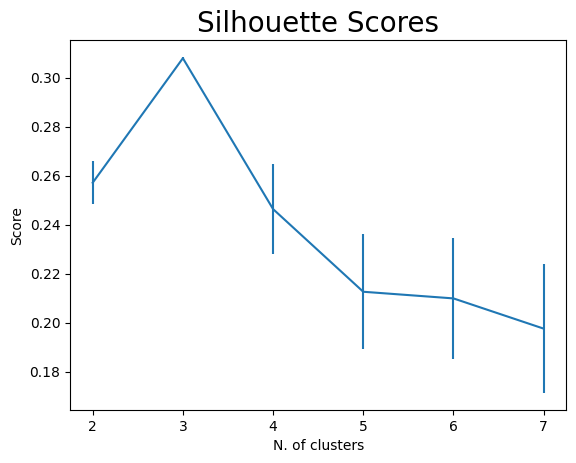

In [21]:
#Silhouette coefficient
def SelBest(arr:list, X:int)->list:
    '''
    #returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gm=GaussianMixture(n, n_init=2).fit(h_2013_subset)
        labels=gm.predict(h_2013_subset)
        sil=metrics.silhouette_score(h_2013_subset, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

#Number of components(k) selection:
# Silhouette score checks how much the clusters are compact and well separated.
# The more the score is near to one, the better the clustering is.
# Since we already know that the fitting procedure is not deterministic,
# we run twenty fits for each number of clusters, then we consider the mean value and the standard deviation of the best five runs.

# Silhouette Scores reflect that the best number of clusters is 3: we will see later if also AIC and BIC indices confirm this suggestion.


In [22]:
# INTERNAL EVALUATION
# silhouette coefficient: [-1,+1], how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
#The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

data_subset = h_2013_subset[['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption']]
silhouette = silhouette_score(data_subset, pred)
print(f'Silhouette Score: {silhouette}')



# calinski_harabasz: ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters
# (where the dispersion is the sum of squared distances). Higher values mean good clustering.

calinski_harabasz= metrics.calinski_harabasz_score(data_subset, pred)
print(f'Calinski Harabasz Score: {calinski_harabasz}')


# davies bouldin: Due to the way it is defined, as a function of the ratio of the within cluster scatter, to the between cluster separation,
#a lower value will mean that the clustering is better. It is a symmetric and non negative index

davies_bouldin = davies_bouldin_score(data_subset, pred)
print(f'Davies Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.1935030732884324
Calinski Harabasz Score: 35.389684620730705
Davies Bouldin Score: 1.7589561380597132


In [23]:
# Aic and Bic to determine the best fit
n_c = [2, 3, 4, 5, 6, 7]
aic = []
bic = []

for i in n_c:
  gm = GaussianMixture(n_components=i, random_state=123)
  gm.fit(data_subset)
  aic.append(round(gm.aic(data_subset)))
  bic.append(round(gm.bic(data_subset)))


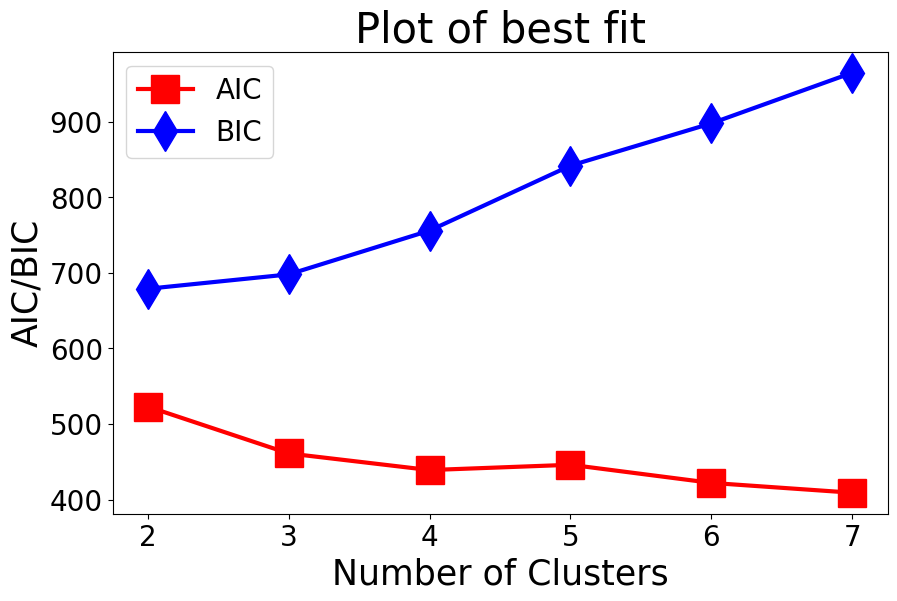

In [24]:
plt.figure(figsize=(10,6))
plt.plot(n_c, aic, color='r', linewidth=3, marker='s', markersize=20, label='AIC')
plt.plot(n_c, bic, color='b', linewidth=3, marker='d', markersize=20, label='BIC')
plt.ylabel('AIC/BIC', fontsize=25)
plt.xlabel('Number of Clusters', fontsize=25)
plt.title('Plot of best fit', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [25]:
print(aic)
print(bic)

[523, 461, 439, 446, 422, 409]
[679, 698, 756, 842, 898, 965]


## Mixture model with 3 clusters, as suggested by silhouette ciefficient and AIC (2013)

In [26]:

# fitting models with 3 clusters on 2013
gm_3 = GaussianMixture(n_components=3,
                     covariance_type='diag',
                     tol=0.0001,
                     reg_covar=1e-06,
                     max_iter=100,
                     n_init=50,
                     init_params='k-means++',
                     weights_init=None,
                     means_init=None,
                     precisions_init=None,
                     random_state=123,
                     warm_start=False,
                     verbose=0,
                     verbose_interval=10).fit(h_2013_subset)


pred_3 = gm_3.predict(h_2013_subset)
pred_3


array([2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0,
       1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1,
       2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2])

In [27]:
# Ordering labels
# cluster 2--> 0:
# cluster 0--> 1
# cluster 1--> 2

cluster_array = np.array([2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0,
       1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1,
       2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2])
remapped_clusters = np.where(cluster_array == 2, 0,
                                np.where(cluster_array == 0, 1,
                                         np.where(cluster_array == 1, 2, 2)))

print(remapped_clusters)


[0 1 0 1 1 2 2 1 2 0 1 2 0 1 1 1 0 1 1 0 0 0 2 0 2 1 0 0 2 0 1 1 2 2 1 1 1
 1 2 0 2 2 0 1 2 0 1 1 0 0 0 1 2 0 1 1 0 2 2 1 1 2 1 1 0 1 1 1 1 2 0 0 1 0
 2 0 1 1 1 1 0 1 0 2 2 1 0 0 1 0 2 1 1 1 2 2 1 1 1 0 1 0 1 1 2 0 1 2 1 2 0
 0 0 1 2 1 1 0 1 2 2 2 1 1 1 0 0 0]


In [28]:

h_2013_subset['Cluster']=remapped_clusters

#h_2013_subset.reset_index(inplace=True)
h_2013_subset['Country']= h_2013['Country name']
h_2013_subset['Happiness Score']= h_2013['Happiness']

h_2013_subset


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster,Country,Happiness Score
0,-0.396608,-0.746683,-0.431985,-0.285574,0.096235,0.087987,0,Afghanistan,3.572100
1,-0.031794,-0.283982,0.539668,-0.480307,-0.501428,0.380758,1,Albania,4.550648
2,-0.115668,-0.250329,-0.528421,-0.771026,-0.200795,0.099634,0,Angola,3.937107
3,0.425373,0.615694,0.353089,0.040854,-0.512719,0.225295,1,Argentina,6.582260
4,-0.044654,-0.322914,0.156053,-0.714210,-0.497563,0.334239,1,Armenia,4.277191
...,...,...,...,...,...,...,...,...,...
123,0.206549,0.450038,0.172651,-0.356035,-0.736968,0.234761,1,Uganda,3.709579
124,-0.286678,-0.268022,0.154688,0.891137,-0.164174,0.031188,1,Ukraine,4.710803
125,-0.445782,-0.408610,-0.283272,-0.553660,-0.411703,0.279347,0,United Arab Emirates,6.620951
126,-0.509514,-0.179129,-0.783077,0.133390,-0.267628,-0.075373,0,United Kingdom,6.918055


In [29]:
# coropleth
fig = go.Figure(
    go.Choropleth(
        locations=h_2013_subset["Country"],
        z=h_2013_subset['Cluster'],
        locationmode='country names',
        colorscale= 'armyrose',
        autocolorscale=False,
        marker_line_color="white",
        marker_line_width=0.5,
        colorbar=dict(
            tickvals=[0, 1, 2],
            ticktext=["0", "1", "2"]
        )
        )
    )
fig.show()

In [30]:

# internal evaluation measures
data_subset = h_2013_subset[['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption']]
silhouette= metrics.silhouette_score(data_subset, pred_3)
print(f'Silhouette Score: {silhouette}') # [-1,+1]

calinski_harabasz= metrics.calinski_harabasz_score(data_subset, pred_3)
print(f'Calinski Harabasz Score: {calinski_harabasz}') #Higher values mean good clustering.

davies_bouldin = davies_bouldin_score(data_subset, pred_3)
print(f'Davies Bouldin Score: {davies_bouldin}') #smaller values mean good clustering


Silhouette Score: 0.21348405699858236
Calinski Harabasz Score: 39.62837750212896
Davies Bouldin Score: 1.787183132310355


# Mixture model 2022

In [31]:

h_2022 = freedom_cleaned[freedom_cleaned['Edition']==2022]
h_2022.reset_index(inplace=True)
h_2022.drop('index', axis=1, inplace=True)
h_2022.info()
h_2022.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               113 non-null    object 
 1   Region                                     113 non-null    object 
 2   C/T                                        113 non-null    object 
 3   Edition                                    113 non-null    int64  
 4   Status                                     113 non-null    object 
 5   PR rating                                  113 non-null    int64  
 6   CL rating                                  113 non-null    int64  
 7   A1                                         113 non-null    int64  
 8   A2                                         113 non-null    int64  
 9   A3                                         113 non-null    int64  
 10  A                         

<ipython-input-31-83e1be4dba42>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country name       0
Region             0
C/T                0
Edition            0
Status             0
                  ..
iso_3166-2         1
region             1
sub-region         1
region-code        1
sub-region-code    1
Length: 76, dtype: int64

In [32]:
h_2022

,Country name,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,Perceptions of corruption % change,Positive affect,Negative affect,Happiness scaled,country-code,iso_3166-2,region,sub-region,region-code,sub-region-code
0,Afghanistan,Asia,c,2022,NF,7,6,0,0,0,...,5.071261e-02,0.205868,0.575512,12.812711,4.0,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Albania,Europe,c,2022,PF,3,3,3,3,3,...,3.191432e-03,0.547126,0.254826,52.122130,8.0,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
2,Argentina,Americas,c,2022,F,2,2,4,4,3,...,5.805304e-05,0.724068,0.284279,62.609935,32.0,ISO 3166-2:AR,Americas,Latin America and the Caribbean,19.0,419.0
3,Armenia,Eurasia,c,2022,PF,4,4,2,2,3,...,7.317947e-07,0.530931,0.549468,53.819427,51.0,ISO 3166-2:AM,Asia,Western Asia,142.0,145.0
4,Australia,Asia,c,2022,F,1,1,4,4,4,...,4.071355e-02,0.710772,0.243920,70.346961,36.0,ISO 3166-2:AU,Oceania,Australia and New Zealand,9.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Uruguay,Americas,c,2022,F,1,1,4,4,4,...,1.799906e-03,0.774694,0.267485,66.708527,858.0,ISO 3166-2:UY,Americas,Latin America and the Caribbean,19.0,419.0
109,Uzbekistan,Eurasia,c,2022,NF,7,6,0,0,1,...,4.775505e-03,0.741082,0.224580,60.162387,860.0,ISO 3166-2:UZ,Asia,Central Asia,142.0,143.0
110,Venezuela,Americas,c,2022,NF,7,6,0,0,0,...,9.868440e-04,0.754337,0.292252,59.489923,862.0,ISO 3166-2:VE,Americas,Latin America and the Caribbean,19.0,419.0
111,Vietnam,Asia,c,2022,NF,7,6,0,0,0,...,1.399085e-02,0.774236,0.108473,62.665086,704.0,ISO 3166-2:VN,Asia,South-eastern Asia,142.0,35.0


In [33]:
# selecting columns

h_2022_subset=h_2022[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
h_2022_subset.set_index('Country name', inplace=True)

In [34]:
# Standardizing
num_col = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
scaler = StandardScaler()
for i in num_col:
  h_2022_subset[[i]] = scaler.fit_transform(h_2022_subset[[i]])


<ipython-input-34-edfc0f52789b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-edfc0f52789b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-edfc0f52789b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-34-edfc0f5

In [35]:
h_2022_subset[h_2022_subset['Healthy life expectancy at birth'].isnull()]

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,
Kosovo,-0.085259,0.60866,NaN,0.627377,1.130732,0.719104
Taiwan,1.038633,0.57613,NaN,0.074027,-0.453264,-0.357116


In [36]:
# Dropping null values
h_2022_subset.dropna(axis=0, how= 'any', inplace=True)

<ipython-input-36-c4bfe396f99a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:

# Normalizing
h_2022_subset = normalize(h_2022_subset)

# Converting the numpy array into a pandas DataFrame
h_2022_subset = pd.DataFrame(h_2022_subset)
h_2022_subset


,0,1,2,3,4,5
0,-0.272543,-0.660759,-0.315087,-0.622660,-0.044338,0.012898
1,0.071427,-0.393067,0.543083,0.072735,-0.465507,0.568744
2,0.290694,0.458743,0.244927,0.204111,-0.686030,0.364367
3,0.100400,0.074730,0.374948,-0.013412,-0.915730,-0.070771
4,0.490903,0.430392,0.454263,0.235456,0.341926,-0.441667
...,...,...,...,...,...,...
104,0.336950,0.518976,0.278923,0.529594,-0.356475,-0.363023
105,-0.180525,0.225935,0.022653,0.588820,0.713641,-0.244658
106,-0.859795,0.357664,-0.129176,-0.093977,-0.231729,0.231545
107,-0.072933,0.259575,0.026083,0.744316,-0.608762,-0.044994


In [38]:

# Renaming columns
h_2022_subset.rename(columns = {0:'Log GDP per capita', 1:'Social support', 2:'Healthy life expectancy at birth', 3:'Freedom to make life choices', 4:'Generosity', 5:'Perceptions of corruption'}, inplace = True)
h_2022_subset


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-0.272543,-0.660759,-0.315087,-0.622660,-0.044338,0.012898
1,0.071427,-0.393067,0.543083,0.072735,-0.465507,0.568744
2,0.290694,0.458743,0.244927,0.204111,-0.686030,0.364367
3,0.100400,0.074730,0.374948,-0.013412,-0.915730,-0.070771
4,0.490903,0.430392,0.454263,0.235456,0.341926,-0.441667
...,...,...,...,...,...,...
104,0.336950,0.518976,0.278923,0.529594,-0.356475,-0.363023
105,-0.180525,0.225935,0.022653,0.588820,0.713641,-0.244658
106,-0.859795,0.357664,-0.129176,-0.093977,-0.231729,0.231545
107,-0.072933,0.259575,0.026083,0.744316,-0.608762,-0.044994


In [39]:

h_2022_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Log GDP per capita,109.0,0.013272,0.401030,-0.859795,-0.330828,0.044312,0.392834,0.701780
Social support,109.0,0.049500,0.393272,-0.911820,-0.281656,0.157952,0.330696,0.680994
Healthy life expectancy at birth,109.0,0.031376,0.406591,-0.732585,-0.366301,0.092142,0.346840,0.788754
Freedom to make life choices,109.0,0.038454,0.388659,-0.845438,-0.285870,0.061429,0.350233,0.744316
Generosity,109.0,-0.071726,0.453827,-0.950937,-0.468545,-0.050987,0.260327,0.925097
Perceptions of corruption,109.0,0.055847,0.397446,-0.786522,-0.168593,0.112365,0.332605,0.841937


In [40]:
# covariance matrix
h_2022_subset.cov()


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Log GDP per capita,0.160825,0.115478,0.128443,0.034140,-0.018851,-0.044193
Social support,0.115478,0.154663,0.104284,0.060626,-0.009739,-0.013252
Healthy life expectancy at birth,0.128443,0.104284,0.165316,0.044619,-0.018090,-0.035256
Freedom to make life choices,0.034140,0.060626,0.044619,0.151056,0.011115,-0.034673
Generosity,-0.018851,-0.009739,-0.018090,0.011115,0.205959,-0.042662
Perceptions of corruption,-0.044193,-0.013252,-0.035256,-0.034673,-0.042662,0.157963


In [41]:
# correlation matrix
h_2022_subset.corr()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Log GDP per capita,1.000000,0.732201,0.787728,0.219036,-0.103577,-0.277265
Social support,0.732201,1.000000,0.652177,0.396643,-0.054566,-0.084786
Healthy life expectancy at birth,0.787728,0.652177,1.000000,0.282354,-0.098040,-0.218170
Freedom to make life choices,0.219036,0.396643,0.282354,1.000000,0.063016,-0.224462
Generosity,-0.103577,-0.054566,-0.098040,0.063016,1.000000,-0.236524
Perceptions of corruption,-0.277265,-0.084786,-0.218170,-0.224462,-0.236524,1.000000


In [42]:
# lbels
pred = gm.predict(h_2022_subset)
pred


array([2, 3, 1, 5, 4, 4, 6, 4, 6, 5, 0, 5, 3, 0, 2, 4, 0, 1, 1, 2, 6, 6,
       1, 6, 3, 3, 1, 4, 5, 3, 5, 5, 4, 6, 4, 1, 0, 5, 4, 6, 3, 5, 6, 6,
       1, 4, 6, 4, 3, 4, 1, 3, 0, 1, 5, 1, 6, 4, 1, 3, 6, 3, 4, 2, 6, 6,
       1, 2, 5, 5, 0, 0, 5, 6, 0, 6, 4, 4, 5, 6, 3, 4, 1, 1, 3, 5, 1, 3,
       3, 6, 6, 1, 3, 1, 4, 4, 6, 4, 6, 6, 3, 4, 4, 4, 5, 4, 0, 5, 2])

In [43]:

h_2022_subset['Cluster']=pred

h_2022_subset.reset_index(inplace=True)


h_2022_subset['Happiness Score']= h_2022['Happiness']
h_2022_subset['Country']= h_2022['Country name']

h_2022_subset


,index,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster,Happiness Score,Country
0,0,-0.272543,-0.660759,-0.315087,-0.622660,-0.044338,0.012898,2,1.281271,Afghanistan
1,1,0.071427,-0.393067,0.543083,0.072735,-0.465507,0.568744,3,5.212213,Albania
2,2,0.290694,0.458743,0.244927,0.204111,-0.686030,0.364367,1,6.260993,Argentina
3,3,0.100400,0.074730,0.374948,-0.013412,-0.915730,-0.070771,5,5.381943,Armenia
4,4,0.490903,0.430392,0.454263,0.235456,0.341926,-0.441667,4,7.034696,Australia
...,...,...,...,...,...,...,...,...,...,...
104,104,0.336950,0.518976,0.278923,0.529594,-0.356475,-0.363023,5,4.637436,Ukraine
105,105,-0.180525,0.225935,0.022653,0.588820,0.713641,-0.244658,4,6.737606,United Arab Emirates
106,106,-0.859795,0.357664,-0.129176,-0.093977,-0.231729,0.231545,0,6.721780,United Kingdom
107,107,-0.072933,0.259575,0.026083,0.744316,-0.608762,-0.044994,5,6.692790,United States


In [44]:

# coropleth map
fig = go.Figure(
    go.Choropleth(
        locations=h_2022_subset["Country"],
        z=h_2022_subset['Cluster'],
        locationmode='country names',
        colorscale= 'armyrose',
        autocolorscale=False,
        marker_line_color="white",
        marker_line_width=0.5,
        )
    )
fig.show()


In [45]:
# Dropping non useful columns
h_2022_subset.drop(['Cluster', 'Country', 'Happiness Score',	'index'], axis=1, inplace=True)

h_2022_subset


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,-0.272543,-0.660759,-0.315087,-0.622660,-0.044338,0.012898
1,0.071427,-0.393067,0.543083,0.072735,-0.465507,0.568744
2,0.290694,0.458743,0.244927,0.204111,-0.686030,0.364367
3,0.100400,0.074730,0.374948,-0.013412,-0.915730,-0.070771
4,0.490903,0.430392,0.454263,0.235456,0.341926,-0.441667
...,...,...,...,...,...,...
104,0.336950,0.518976,0.278923,0.529594,-0.356475,-0.363023
105,-0.180525,0.225935,0.022653,0.588820,0.713641,-0.244658
106,-0.859795,0.357664,-0.129176,-0.093977,-0.231729,0.231545
107,-0.072933,0.259575,0.026083,0.744316,-0.608762,-0.044994


Text(0, 0.5, 'Score')

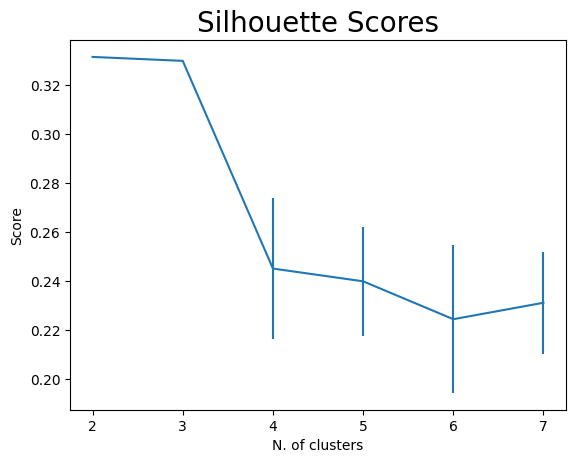

In [46]:
# Silhoueette coefficient
def SelBest(arr:list, X:int)->list:
    '''
    #returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gm=GaussianMixture(n, n_init=2).fit(h_2022_subset)
        labels=gm.predict(h_2022_subset)
        sil=metrics.silhouette_score(h_2022_subset, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

#Number of components(k) selection:
# Silhouette score checks how much the clusters are compact and well separated.
# The more the score is near to one, the better the clustering is.
# Since we already know that the fitting procedure is not deterministic,
# we run twenty fits for each number of clusters, then we consider the mean value and the standard deviation of the best five runs.

# Silhouette Scores reflect that the best number of clusters is 3: we will see later if also AIC and BIC indices confirm this suggestion.


In [47]:
#Internal evaluation measures

# silhouette coefficient: [-1,+1], how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
#The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

data_subset = h_2022_subset[['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption']]
silhouette = silhouette_score(data_subset, pred)
print(f'Silhouette Score: {silhouette}')



# calinski_harabasz: ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters
# (where the dispersion is the sum of squared distances). Higher values mean good clustering.

calinski_harabasz= metrics.calinski_harabasz_score(data_subset, pred)
print(f'Calinski Harabasz Score: {calinski_harabasz}')


# davies bouldin: Due to the way it is defined, as a function of the ratio of the within cluster scatter, to the between cluster separation,
#a lower value will mean that the clustering is better. It is a symmetric and non negative index

davies_bouldin = davies_bouldin_score(data_subset, pred)
print(f'Davies Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.14395104633093136
Calinski Harabasz Score: 28.233524032397188
Davies Bouldin Score: 1.5664277275404968


In [48]:
# Aic and Bic to determine the best fit
n_c = [2, 3, 4, 5, 6, 7]
aic = []
bic = []

for i in n_c:
  gm = GaussianMixture(n_components=i, random_state=123)
  gm.fit(data_subset)
  aic.append(round(gm.aic(data_subset)))
  bic.append(round(gm.bic(data_subset)))


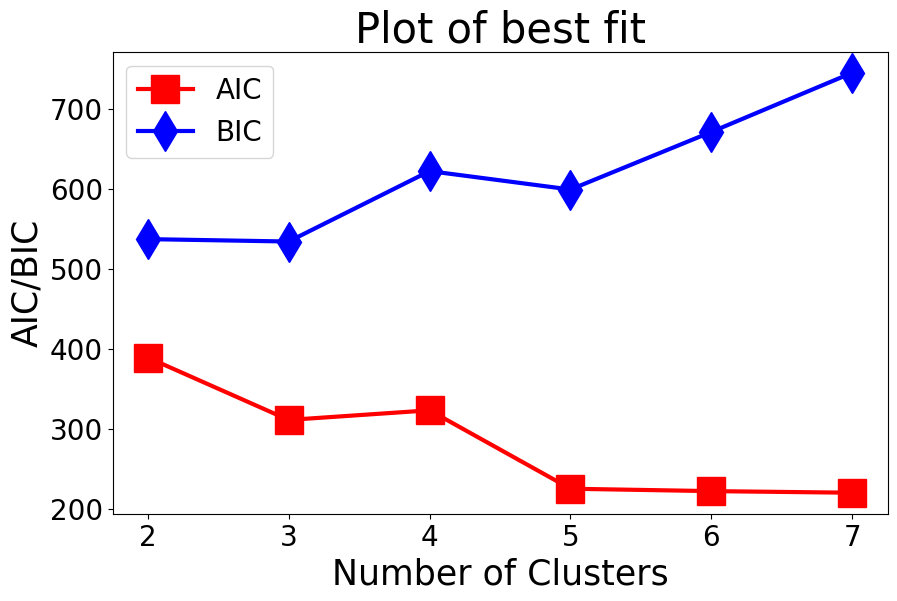

In [49]:
plt.figure(figsize=(10,6))
plt.plot(n_c, aic, color='r', linewidth=3, marker='s', markersize=20, label='AIC')
plt.plot(n_c, bic, color='b', linewidth=3, marker='d', markersize=20, label='BIC')
plt.ylabel('AIC/BIC', fontsize=25)
plt.xlabel('Number of Clusters', fontsize=25)
plt.title('Plot of best fit', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [50]:
print(aic)
print(bic)

[389, 311, 323, 225, 222, 220]
[537, 534, 622, 599, 671, 745]


## Mixture model with 3 clusters, as BIC suggestion

In [51]:
pred_3 = gm_3.predict(h_2022_subset)
pred_3


array([2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2])

In [52]:
# Ordering clusters
# cluster 2--> 0: paesi meno liberi
# cluster 0--> 1
# cluster 1--> 2

cluster_array = np.array([2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2])
remapped_clusters = np.where(cluster_array == 2, 0,
                                np.where(cluster_array == 0, 1,
                                         np.where(cluster_array == 1, 2, 2)))

print(remapped_clusters)


[0 1 2 1 2 2 0 2 0 1 0 1 1 0 0 2 0 2 1 0 0 0 2 0 1 1 2 2 1 1 1 1 2 0 2 2 0
 1 2 0 1 1 0 0 1 2 0 1 1 2 2 1 1 1 1 1 0 1 1 1 0 1 2 0 0 0 2 0 1 1 1 1 1 0
 0 0 2 2 1 0 1 2 2 1 1 2 1 1 1 0 0 2 1 2 2 2 0 1 0 0 1 1 2 1 2 1 0 1 0]


In [53]:

h_2022_subset['Cluster']=remapped_clusters

h_2022_subset['Country']= h_2022['Country name']
h_2022_subset['Happiness Score']= h_2022['Happiness']

h_2022_subset


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster,Country,Happiness Score
0,-0.272543,-0.660759,-0.315087,-0.622660,-0.044338,0.012898,0,Afghanistan,1.281271
1,0.071427,-0.393067,0.543083,0.072735,-0.465507,0.568744,1,Albania,5.212213
2,0.290694,0.458743,0.244927,0.204111,-0.686030,0.364367,2,Argentina,6.260993
3,0.100400,0.074730,0.374948,-0.013412,-0.915730,-0.070771,1,Armenia,5.381943
4,0.490903,0.430392,0.454263,0.235456,0.341926,-0.441667,2,Australia,7.034696
...,...,...,...,...,...,...,...,...,...
104,0.336950,0.518976,0.278923,0.529594,-0.356475,-0.363023,2,Ukraine,4.637436
105,-0.180525,0.225935,0.022653,0.588820,0.713641,-0.244658,1,United Arab Emirates,6.737606
106,-0.859795,0.357664,-0.129176,-0.093977,-0.231729,0.231545,0,United Kingdom,6.721780
107,-0.072933,0.259575,0.026083,0.744316,-0.608762,-0.044994,1,United States,6.692790


In [54]:
# coropleth map dei clusters
fig = go.Figure(
    go.Choropleth(
        locations=h_2022_subset["Country"],
        z=h_2022_subset['Cluster'],
        locationmode='country names',
        colorscale= 'armyrose',
        autocolorscale=False,
        marker_line_color="white",
        marker_line_width=0.5,
        colorbar=dict(
            tickvals=[0, 1, 2],
            ticktext=["0", "1", "2"]
        )
        )
    )
fig.show()

In [55]:

# internal evaluation measures
data_subset = h_2022_subset[['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption']]
silhouette= metrics.silhouette_score(data_subset, pred_3)
print(f'Silhouette Score: {silhouette}') # [-1,+1], higher values mean good separation in clustering


calinski_harabasz= metrics.calinski_harabasz_score(data_subset, pred_3)
print(f'Calinski Harabasz Score: {calinski_harabasz}') #Higher values mean good clustering.

davies_bouldin = davies_bouldin_score(data_subset, pred_3)
print(f'Davies Bouldin Score: {davies_bouldin}') #smaller values mean good clustering


Silhouette Score: 0.2608671515953237
Calinski Harabasz Score: 44.051823422527455
Davies Bouldin Score: 1.5403470238650148
